| |<font size="5">LinearRegression معالجة البيانات بشكل تسلسلي </font>|
|-:|-:|
|<img src="https://i.ibb.co/WcbbqYm/pipes.png"></img>||
||<font size="4"> تحميل البيانات  </font>| 
||<font size="4"> تصميم بنية معالجة متسلسلة </font>| 
||<font size="4"> تدريب البيانات </font>| 
||<font size="4"> تقويم أداء الخوارزمية </font>| 

In [ ]:
pwd

'/content/drive/My Drive/ML-Course'

In [ ]:
cd drive/My\ Drive/ML-Course

[Errno 2] No such file or directory: 'drive/My Drive/ML-Course'
/content/drive/My Drive/ML-Course


In [ ]:
ls ./data/

Advertising.csv                       HousePrice3.csv
bst_features.csv                      HousePrice_4.csv
bst_target.csv                        housePrice_5.csv
california_housing_test.csv           HousePrice_5.csv
california_housing_train.csv          HousePrice.csv
data_1.csv                            kidney_disease.csv
data_cleaned.csv                      pandas_1.csv
df_merged.cvs                         pandas_2.csv
features_kept1.csv                    pandas_3.csv
features_selected.txt                 sales.csv
Google_Stock_Price_Test.textClipping  sales-funnel.xlsx
HousePrice1.csv                       wdbc.data
HousePrice2.csv                       weather.csv


In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/housePrice_5.csv", index_col=0)

In [ ]:
df.head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,MiscVal,LotArea,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition,SalePrice
0,5,548,2566,196.0,0,854,706,856,0,8450,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,208500
1,31,460,2524,0.0,298,0,978,1262,0,9600,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd,WD,Normal,181500
2,6,608,2706,162.0,0,866,486,920,0,11250,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,223500
3,36,642,2473,0.0,0,756,216,961,0,9550,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml,140000
4,8,836,3343,350.0,192,1053,655,1145,0,14260,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,250000


In [ ]:

df.shape

(1460, 31)

In [ ]:
#  طيبعة البيانات  وعدد البيانات الناقصة
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1460 non-null   int64  
 1   GarageArea     1460 non-null   int64  
 2   TotalSF        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   WoodDeckSF     1460 non-null   int64  
 5   2ndFlrSF       1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   MiscVal        1460 non-null   int64  
 9   LotArea        1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Street         1460 non-null   object 
 12  LandContour    1460 non-null   object 
 13  Utilities      1460 non-null   object 
 14  LotConfig      1460 non-null   object 
 15  Neighborhood   1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  Condition2     1460 non-null   object 
 18  BldgType

![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [ ]:
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df.select_dtypes("number").columns

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'SalePrice'],
      dtype='object')

In [ ]:
# التدقيق في احصائيات البينات للوقوف على التباين فيها إن وجد
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1460.0,22.950,20.641,-1.0,4.0,14.0,41.00,60.0
GarageArea,1460.0,472.980,213.805,0.0,334.5,480.0,576.00,1418.0
TotalSF,1460.0,2572.893,823.598,334.0,2014.0,2479.0,3008.50,11752.0
MasVnrArea,1452.0,103.685,181.066,0.0,0.0,0.0,166.00,1600.0
WoodDeckSF,1460.0,94.245,125.339,0.0,0.0,0.0,168.00,857.0
2ndFlrSF,1460.0,346.992,436.528,0.0,0.0,0.0,728.00,2065.0
BsmtFinSF1,1460.0,443.640,456.098,0.0,0.0,383.5,712.25,5644.0
1stFlrSF,1460.0,1162.627,386.588,334.0,882.0,1087.0,1391.25,4692.0
MiscVal,1460.0,43.489,496.123,0.0,0.0,0.0,0.00,15500.0
LotArea,1460.0,10516.828,9981.265,1300.0,7553.5,9478.5,11601.50,215245.0


- ضرورة اعادة توزيع البيانات خصوصا تلك التي تشهد تباينا كبير يظهر بالاساس في فارق القيم الصغرى والكبرى

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [ ]:

#Standardize the features by removing the mean and scaling to unit variance.
import numpy as np
X=df.drop("SalePrice", axis=1)
y=np.log1p(df.SalePrice)    # test 1st as df.Saleprice  then turn to log1p
# y=df.SalePrice
X.keys()

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'MSZoning', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#  لن نقوم بحذف جميع القيم الناقصة ولكن سنعالجها  (
# df.dropna(inplace=True)

In [ ]:
df.shape

(1460, 31)

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)



## Ppeline  توظيف المعالجة المتسلسلة 
![](https://i.ibb.co/RYrRMCz/pipeline.png)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
  

num_pipeline= make_pipeline(
    SimpleImputer(strategy="median"),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول
    StandardScaler()    # تغيير سلم البيانات الرقمية 
)


preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     remainder="drop"  # واسقاط باقي البيانات الغير رقمية 
     
     )

In [ ]:

# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train)

array([[ 1.159,  0.013, -0.718, ..., -0.293, -0.125, -0.168],
       [-1.106, -2.273, -0.416, ..., -0.123, -0.125, -0.203],
       [-1.058,  1.699,  0.781, ...,  1.152, -0.125, -0.178],
       ...,
       [-0.335,  0.451, -1.034, ..., -0.781, -0.125, -0.223],
       [-0.672, -1.244, -0.298, ..., -0.657, -0.125, -0.269],
       [-1.01 ,  0.871,  0.414, ...,  0.995, -0.125, -0.611]])

<img src="https://static.thenounproject.com/png/2010152-200.png" width=100></img>

In [ ]:

# نموذج   الانحدار الخطي بناء على تحويل البيانات السابقة 
from sklearn.linear_model import  LinearRegression
model=make_pipeline(
    preprocess,

    LinearRegression()

)

In [ ]:
# تدريب البيانات
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                             

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
# تقييم أداء  خوارزمية الأنحدار الخطي 
%precision %.3f
model.score(X_test, y_test)

0.796

In [ ]:
#  معايير نموذج الانحدار الخطي
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'linearregression', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__pipeline', 'columntransformer__pipeline__memory', 'columntransformer__pipeline__steps', 'columntransformer__pipeline__verbose', 'columntransformer__pipeline__simpleimputer', 'columntransformer__pipeline__standardscaler', 'columntransformer__pipeline__simpleimputer__add_indicator', 'columntransformer__pipeline__simpleimputer__copy', 'columntransformer__pipeline__simpleimputer__fill_value', 'columntransformer__pipeline__simpleimputer__missing_values', 'columntransformer__pipeline__simpleimputer__strategy', 'columntransformer__pipeline__simpleimputer__verbose', 'columntransformer__pipeline__standardscaler__copy', 'columntransformer__pipeline__standardscaler__with_mean', 'columntransfor

In [ ]:
# Coef    معاملات الخصائص الرقمية 
model.named_steps['linearregression'].coef_

array([-0.122,  0.096,  0.103,  0.023,  0.025,  0.06 ,  0.021,  0.051,
       -0.007,  0.02 ])

In [ ]:
#Coeff  معملات جميع المتغيرات 
pd.DataFrame(model.named_steps['linearregression'].coef_, X.select_dtypes("number").columns ,columns=["Coeff"] )

,Coeff
Age,-0.122
GarageArea,0.096
TotalSF,0.103
MasVnrArea,0.023
WoodDeckSF,0.025
2ndFlrSF,0.060
BsmtFinSF1,0.021
1stFlrSF,0.051
MiscVal,-0.007
LotArea,0.020


<img src="https://i.ibb.co/4JtGHCy/predict.jpg" width=150 ></img>

In [ ]:
# التنبؤ 
y_pred=model.predict(X_test)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
# تقويم  نموذج الانحدار الخطي
 
from sklearn import  metrics
print(f" MAE : {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f" MSE : {metrics.mean_squared_error(y_test, y_pred)}")
print(f" RMSE : {np.sqrt(metrics.r2_score(y_test, y_pred)):.3}")
print(f" R^2 : {metrics.r2_score(y_test, y_pred)}")
print(f" Expalined Variance Score : {metrics.explained_variance_score(y_test, y_pred)}")

 MAE : 0.131
 MSE : 0.034744904365783175
 RMSE : 0.892
 R^2 : 0.7961328796100865
 Expalined Variance Score : 0.796382613356817


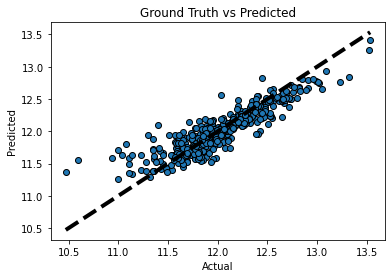

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
pip install scikit-plot 

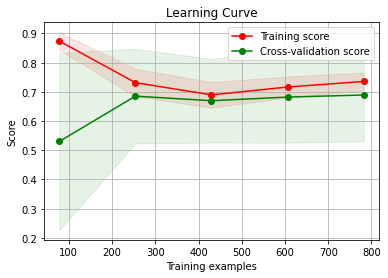

In [ ]:
# تخطيط التعلّم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model, X_train, y_train, scoring="r2") # neg_mean_absolute_error")